In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [19]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [20]:
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

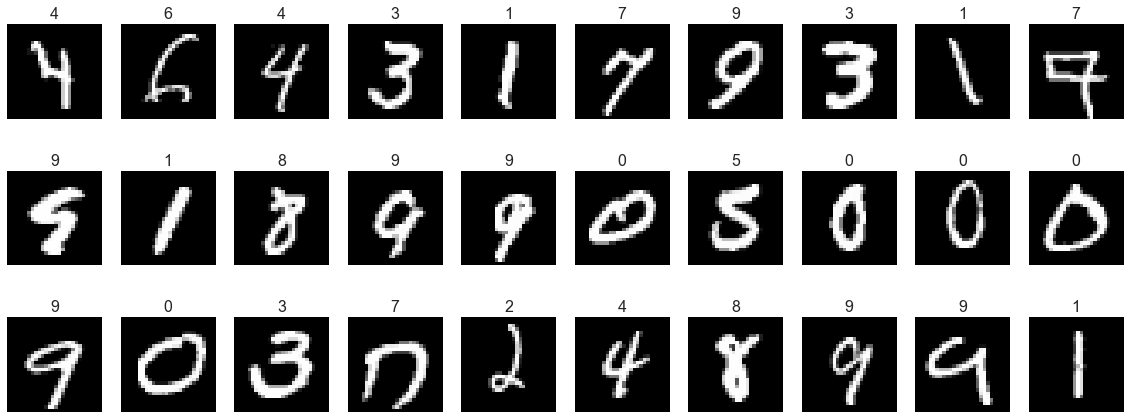

In [21]:
n_samples = 30
images, labels = get_samples(n_samples, X_train, y_train)
# images, labels = get_digit(4, n_samples)
plot_images(images, labels)

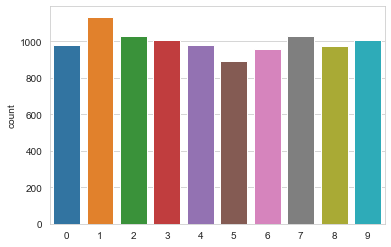

In [22]:
# Your code here
sns.countplot(y_test)

In [23]:
# Your code here
print('Pixel value range:', X_train.min(), X_train.max())

Pixel value range: 0 255


In [24]:
n_samples = 1000
n_test_samples = 200
# Your code here
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)

# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

In [25]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (1000, 784)
Test data (200, 784)


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [27]:
# Your code here
clf = SVC(kernel='linear')
clf.fit(X_train_flat, y_train_flat)

SVC(kernel='linear')

In [28]:
parameters = {'gamma': [0.0001, 0.001, 0.01],
              'C':[0.01, 0.1, 1, 10, 100]}

model = SVC(kernel='rbf')

gridsearch_models = GridSearchCV(estimator=model,
                                 param_grid=parameters,
                                 scoring='accuracy',
                                 cv=5, n_jobs=-1)

gridsearch_models.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [29]:
pd.DataFrame(gridsearch_models.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.379966,0.449824,0.466450,0.046325,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.125,0.125,0.125,0.125,0.120,0.124,0.002000,10
1,2.342528,0.185476,0.366573,0.004043,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.125,0.125,0.125,0.125,0.120,0.124,0.002000,10
2,2.082174,0.030443,0.358056,0.005465,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.125,0.125,0.125,0.125,0.120,0.124,0.002000,10
3,2.061965,0.017451,0.366358,0.016417,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.125,0.125,0.125,0.125,0.120,0.124,0.002000,10
4,2.125171,0.048249,0.352091,0.011762,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.125,0.125,0.125,0.125,0.120,0.124,0.002000,10
5,1.938310,0.017741,0.327377,0.008479,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.670,0.700,0.690,0.695,0.710,0.693,0.013266,9
6,2.104943,0.048434,0.307476,0.010295,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.125,0.125,0.125,0.125,0.120,0.124,0.002000,10
7,1.504337,0.015486,0.287234,0.005099,1,0.001,"{'C': 1, 'gamma': 0.001}",0.760,0.790,0.765,0.780,0.805,0.780,0.016432,8
8,1.048832,0.014764,0.234984,0.012126,1,0.01,"{'C': 1, 'gamma': 0.01}",0.875,0.905,0.890,0.905,0.920,0.899,0.015297,3
9,1.471078,0.025997,0.283543,0.009069,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.790,0.810,0.775,0.775,0.815,0.793,0.016912,7


In [30]:
best_model = gridsearch_models.best_estimator_

In [31]:
# Your code here
predictions = best_model.predict(X_test_flat)
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.935


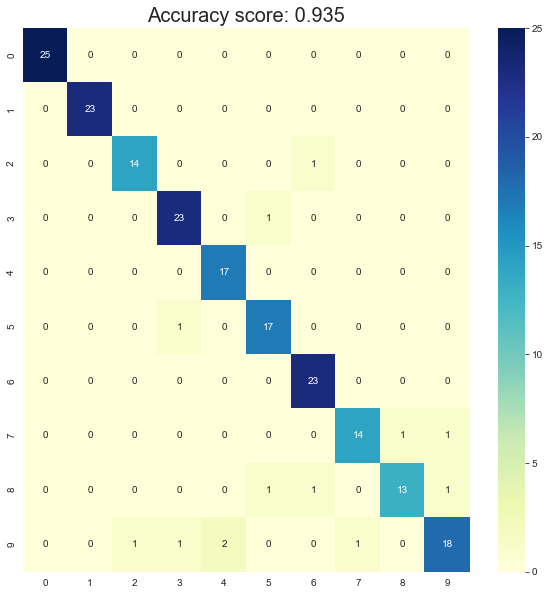

In [32]:
# Your code here
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test_flat, predictions), cmap="YlGnBu", annot=True, fmt="d")
plt.title(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}', fontsize=20)
plt.show()

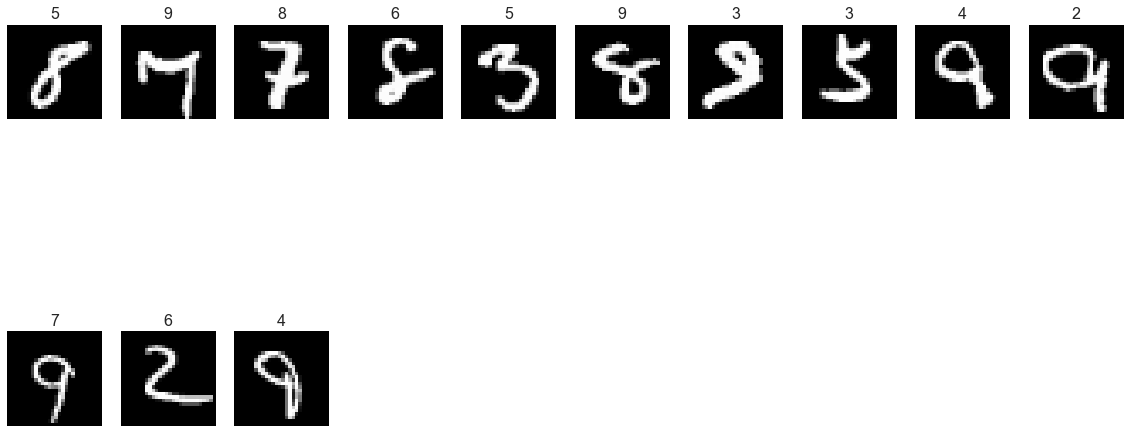

In [33]:
# Your code here
wrong_predicted_images = X_test_flat[y_test_flat != predictions].reshape((-1, 28, 28))
wrong_predictions = predictions[y_test_flat != predictions]

plot_images(wrong_predicted_images, wrong_predictions)

In [34]:
import pickle

pickle.dump(clf, open('svm_mnist.pkl', 'wb'))

In [35]:
# Your code here
with open('svm_mnist.pkl', 'rb') as model:
    reload_model = pickle.load(model)

predictions = reload_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}')

Accuracy score: 0.91
